# Startup Success Prediction Model

## Problem Statement

**Startup** is a newly established business that is currently growing thanks to digital platforms. It has also become an important component of the global economy and innovation system. The startup ecosystem is very fragile and requires a lot of funding to operate with a small team of workers. This makes it very important for venture capital firms to assess the productivity and performance of  **Startup**.

As a result, this can be used as a benchmark to determine whether a particular startup will receive funding to advance its goals or whether it will be successful or not. To manage a startup business, it is important to analyze what makes a startup successful and how to drive that success.

## Goals
The goal is to determine whether a startup will be successful or not.

## Objective
The objective is to analyze startups based on several variables, determine which variables most influence the success of a startup, and then build a model that can predict the success of a startup.


In [ ]:
# Cek versi python
!python --version

Python 3.9.16


# Data Exploration

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
import scipy

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

### Exploring The Data

In [ ]:
# Read dataset=
df = pd.read_csv('train.csv')
df.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,1/1/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,1/1/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,1/1/2004,NaN,8/24/2005,10/4/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,1/1/2002,NaN,8/2/2005,2/8/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,6/1/2005,NaN,2/1/2007,2/5/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [ ]:
df = df[~df.duplicated()]

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
# Data Numerik

numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


In [ ]:
# Data Categorical

df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


### Change the value of ‘status’ to 1 and 0



In [ ]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

In [ ]:
#Tipe data status diganti dari object ke int
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

### Drop column labels

In [ ]:
#labels dan status check similarity
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [ ]:
#drop feature
df.drop(["labels"], axis=1, inplace=True)

# Exploratory Data Analysis

## Exploratory Data Analysis (EDA)
**Exploratory Data Analysis** refers to the critical process of conducting preliminary investigations on data to discover patterns, find anomalies, test hypotheses (inferential statistics), and check assumptions with the help of descriptive statistics and graphical representations. Data source --> [source](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

## Missing Value

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


- **Analysis results in the dataset used show missing values, including**
- **Total missing values of 1386**
    - **Columns with more than 50% missing values**
        - The variable ‘closed_at’ with a total percentage of 63.70% or a total of 588 columns.
        - The variable ‘Unnamed: 6’ with a total percentage of 53.41% or a total of 493 columns.
    - **Columns with less than 50% missing values**
        - Variable ‘age_first_milestone_year’ with a total percentage of 16.46% or a total of 152 columns.
        - Variable ‘age_last_milestone_year’ with a total percentage of 16.46% or a total of 152 columns.

In [ ]:
# Checking Missing Values Column
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


**The results of the analysis of columns with missing values are as follows:**

- The column **“Unnamed: 6”** is a column containing information from several columns, including the following: the columns **‘city’**, **“state code”**, and **“zip code”**

- The **“closed at”** column is a column where a startup has the status **“Closed,”** therefore all data found there must come from startups with the status **“Acquired.”**

- The **age last milestone year** column provides information about when an achievement was first achieved in a given year.
  - This column contains 771 data points, with a mean of 3.055353 and a median of 2.520500, indicating that the data distribution is not normal.

- The **age_Last_milestone_year** column provides information about when the last milestone was achieved in a given year.
- This column contains 771 data points with a mean of 4.754423 and a median of 4.476700, indicating that the data distribution is not normal.

###  Handling Missing Value Unnamed: 6

Based on the analysis results, it was found that the **Unnamed: 6** column is a combination of several other columns, including the **city, state_code, and zip_code** columns. Therefore, we decided to delete the contents of the **Unnamed: 6** column first and then fill in the data based on the combination of several related columns.

In [ ]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [ ]:
# Total Missing Values kolom "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Kolom "Unnamed: 6": ', totalNull)

Total Missing Values Kolom "Unnamed: 6":  0


### Handling Missing Value closed_at

In [ ]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [ ]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


### Handling Missing Value age_first_milestone_year and age_last_milestone_year

In [ ]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


Based on the analysis results, it was found that the ‘age_first_milestone_year’ and ‘age_last_milestone_year’ columns have null values because the startup does not yet have any milestones. This can be confirmed by looking at the ‘milestones’ column, which contains data 0, accompanied by the ‘age_first_milestone_year’ and ‘age_last_milestone_year’ columns, which are null. Therefore, we decided to fill in the null columns with a value of 0.

In [ ]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

### Handling Missing Value state_code.1

- The **“state_code”** column and the **“state_code.1”** column must be the same, so the **“state_code.1”** column must be dropped.
- The **“state_code.1”** column has a missing value in row 515.

In [ ]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [ ]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


In [ ]:
# Number of Unqie Value in Every Columns
df.nunique()

Unnamed: 0                  923
state_code                   35
latitude                    652
longitude                   651
zip_code                    382
id                          922
city                        221
Unnamed: 6                  252
name                        922
labels                        2
founded_at                  217
closed_at                   202
first_funding_at            585
last_funding_at             680
age_first_funding_year      634
age_last_funding_year       756
age_first_milestone_year    471
age_last_milestone_year     585
relationships                41
funding_rounds                9
funding_total_usd           505
milestones                    8
state_code.1                 35
is_CA                         2
is_NY                         2
is_MA                         2
is_TX                         2
is_otherstate                 2
category_code                35
is_software                   2
is_web                        2
is_mobil

- The **Name**, **Unnamed: 0**, **latitude**, **longitude**, **id**, **object_id**, and **PassengerId** columns are not required because their values are always unique.

### Describe The Data

In [ ]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


- We can perform descriptive statistical analysis using one method for each numeric column.

### Pie Diagram

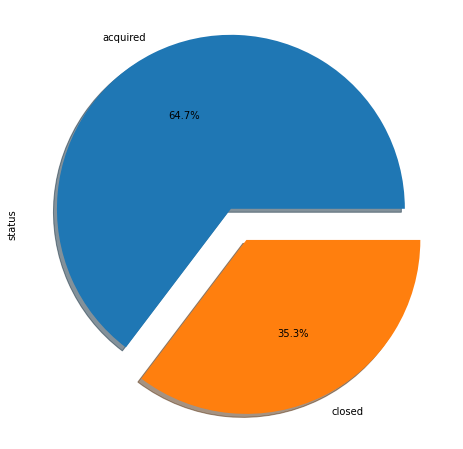

In [ ]:
# Pandas plotting with matplotlib
df['status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

1. `Display the percentage values in the “Status” target column using a pie chart, which shows that label 1 is more prevalent than label 0, but not overly imbalanced.`
2. `Note: if imbalanced data can cause the model to tend to predict the majority class, this can be handled with several data sampling/augmentation methods, such as oversampling and undersampling, and by using a model with class weighting and the AUC metric.`

### Boxplot
[Boxplot Descriptions](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


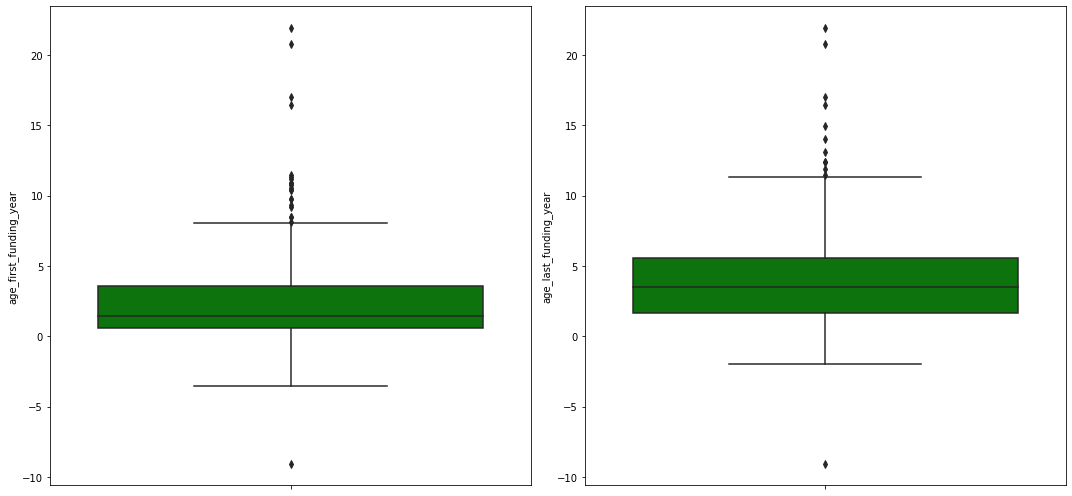

In [ ]:
# Seaborn with Matplotlib

numAtr = ['age_first_funding_year',
               'age_last_funding_year']
plt.figure(figsize=(15, 7))
for i in range(0, len(numAtr)):
    plt.subplot(1, len(numAtr), i+1)
    sns.boxplot(y=df[numAtr[i]], hue=df['relationships'], color='green', saturation=0.8, orient='v')
    plt.tight_layout()

`Displaying the boxplot of the Funding Age values for each target label, it can be seen that there is still some data that falls outside the distribution (outlier).`

# Data Preprocessing

## Duplicate Values

In [ ]:
#check
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


## Negative value

In [ ]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [ ]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [ ]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


## Outliers

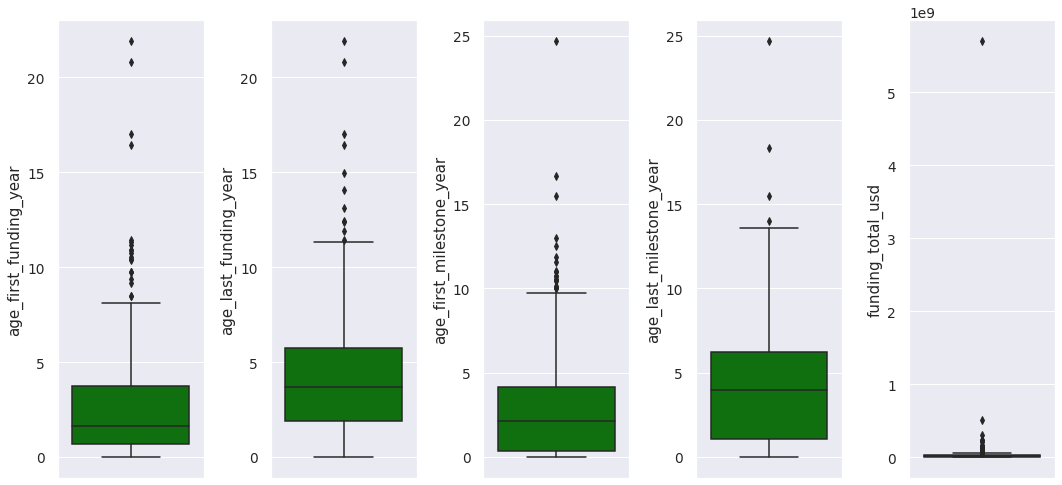

In [ ]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

## Log-transformation of the funding and milestone year variable

In [ ]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

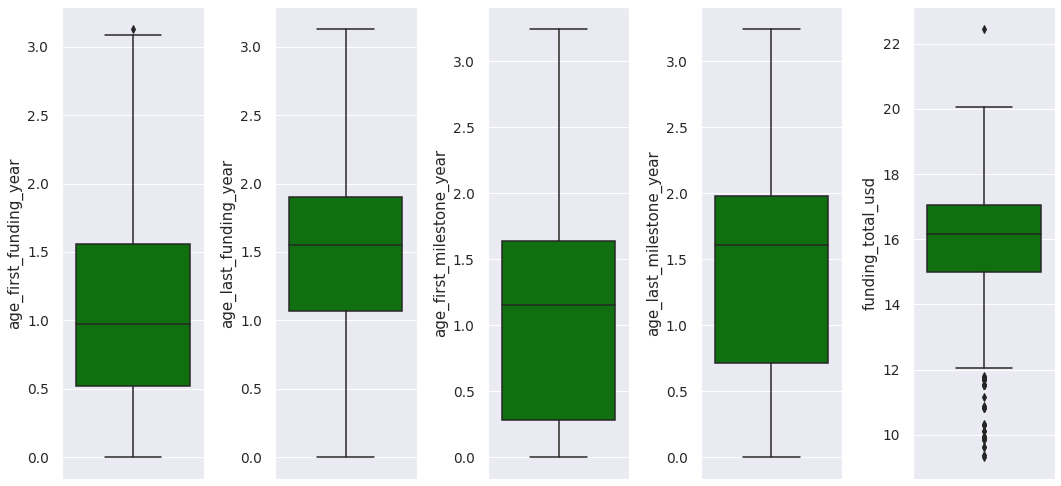

In [ ]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

# Feature Engineering

## new Column "has_RoundABCD"

In [ ]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0


## New Column "has_Investor"

In [ ]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1


In [ ]:
len(df[(df["has_RoundABCD"] == 1)].index)

636

In [ ]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

459

In [ ]:
len(df)

840

In [ ]:
923-490

433

## New Column "has_Seed"

In [ ]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1


In [ ]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
82      True
83     False
84     False

In [ ]:
len(df[(df["has_Seed"] == 1)].index)

179

## New Column "invalid_startup"

In [ ]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0


In [ ]:
len(df[(df["invalid_startup"] == 1)].index)

25

##  New Column "age_startup_year"

In [ ]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)

In [ ]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [ ]:
df['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [ ]:
df['age_startup_year'] = df['age_closed_startup'].dt.days /365

##  New Column "tier_relationships"

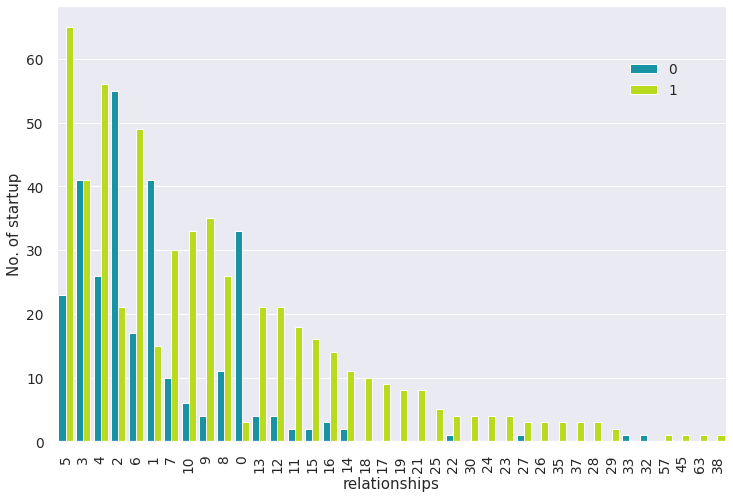

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [ ]:
# create a list of our conditions
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier_relationships'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,age_startup_year,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0,2556 days,7.002740,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,5113 days,14.008219,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,1749 days,4.791781,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,4382 days,12.005479,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0,792 days,2.169863,4


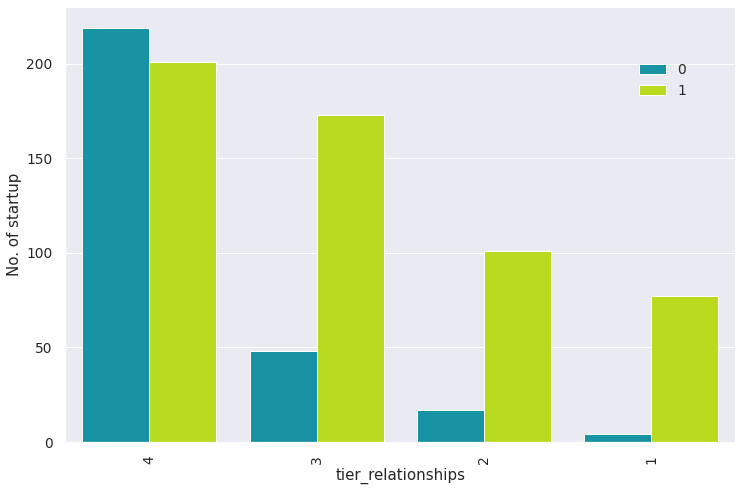

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [ ]:
df['tier_relationships'] = df.tier_relationships.astype(int)

## Removing unnecessary columns for modeling

In [ ]:
df = df.drop(['state_code'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['age_closed_startup'],axis=1)
df = df.drop(['relationships'],axis=1)

# Modeling

In [ ]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 36)
Shape of the y Train : (672,)
Shape of the X test : (168, 36)
Shape of the y test : (168,)


In [ ]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## Train the model :

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

In [ ]:
GradientBoosting_model = GradientBoostingClassifier()
GradientBoosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

## Test the trained model on test data :

In [ ]:
GB_predictions = GradientBoosting_model.predict(X_test)

In [ ]:
score = accuracy_score(y_test ,GB_predictions)
print('Accuracy Gradient Boosting Model:',score)

Accuracy Gradient Boosting Model: 0.875


## Define the model :

In [ ]:
# Build a neural network :
NN_model = Sequential()

NN_model.add(Dense(256, input_dim = X.shape[1], activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Define a checkpoint callback :

In [ ]:
checkpoint_name = 'BestWeights.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_accuracy', verbose = 1, save_best_only = True, mode ='max')
callbacks_list = [checkpoint]

## Train the model :

In [ ]:
t0_nn = time()
NN_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)
train_test_time = time() - t0_nn

Epoch 1/50
7/9 [======================>.......] - ETA: 0s - loss: 0.6398 - accuracy: 0.6228
Epoch 1: val_accuracy improved from -inf to 0.73333, saving model to BestWeights.hdf5
9/9 [==============================] - 7s 146ms/step - loss: 0.6272 - accuracy: 0.6350 - val_loss: 0.5877 - val_accuracy: 0.7333
Epoch 2/50
7/9 [======================>.......] - ETA: 0s - loss: 0.5258 - accuracy: 0.7746
Epoch 2: val_accuracy improved from 0.73333 to 0.78519, saving model to BestWeights.hdf5
9/9 [==============================] - 0s 47ms/step - loss: 0.5297 - accuracy: 0.7635 - val_loss: 0.4851 - val_accuracy: 0.7852
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 0.4739 - accuracy: 0.7970
Epoch 3: val_accuracy did not improve from 0.78519
9/9 [==============================] - 0s 45ms/step - loss: 0.4739 - accuracy: 0.7970 - val_loss: 0.4778 - val_accuracy: 0.7704
Epoch 4/50
5/9 [===============>..............] - ETA: 0s - loss: 0.4280 - accuracy: 0.8281
Epoch 4: val_accuracy

In [ ]:
# Load wights file of the best model :
wights_file = './BestWeights.hdf5' # choose the best checkpoint
NN_model.load_weights(wights_file) # load weights
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Test the trained model on test data :

In [ ]:
predictions = NN_model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# round predictions
rounded = [round(x[0]) for x in predictions]
predictions = rounded

In [ ]:
score = accuracy_score(y_test ,predictions)
print('Test Accuracy:',score)

Test Accuracy: 0.8452380952380952


## Comparision with other models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# models
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
names = [ 'Gradient Boosting Classifier',
          'Extra Trees Classifier',
          'Bagging Classifier',
          'AdaBoost Classifier',
          'Gaussian NB',
          'XGB Classifier',
          'LGBM Classisfier',
          "Random Forest Classifier",
         ]
classifiers = [
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    RandomForestClassifier(),
        ]

# Zipped all architecture
zipped_clf = zip(names,classifiers)

In [ ]:
import warnings
# untuk menghapus warning
warnings.filterwarnings('ignore')

# fungsi accuracy testing
def acc_summary(model, train_X, train_y, val_X, val_y):
    t0 = time()
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)
    train_test_time = time() - t0
    accuracy = accuracy_score(val_y, pred_y)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# fungsi komparator
def classifier_comparator(train_X,train_y,val_X,val_y,classifier=zipped_clf):
    result = []
    for n,c in classifier:
      if n=='Neural Network': # for only neural network
        predictions = NN_model.predict(X_test)
        # round predictions
        rounded = [round(x[0]) for x in predictions]
        predictions = rounded
        score = accuracy_score(val_y, predictions)*100
        print("Test result for {}".format(n))
        print("train and test time: {0:.2f}s".format(train_test_time))
        print("accuracy : {0:.2f}%".format(score))
        print("-"*80)
        result.append((c,n,score,train_test_time))
      else:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,train_X, train_y, val_X, val_y)
        result.append((c,n,clf_acc,tt_time))
    return result

In [ ]:
result = classifier_comparator(X_train, y_train, X_test, y_test)

Validation result for Gradient Boosting Classifier
accuracy : 87.50%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for Extra Trees Classifier
accuracy : 81.55%
train and test time: 0.21s
--------------------------------------------------------------------------------
Validation result for Bagging Classifier
accuracy : 87.50%
train and test time: 0.06s
--------------------------------------------------------------------------------
Validation result for AdaBoost Classifier
accuracy : 86.90%
train and test time: 0.13s
--------------------------------------------------------------------------------
Validation result for Gaussian NB
accuracy : 57.14%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for XGB Classifier
accuracy : 88.10%
train and test time: 0.24s
---------------------------------------------------------------------------

### Plotting

In [ ]:
# Plotting models
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get name and score models
n = [v[1] for v in result]
s = [v[2] for v in result]

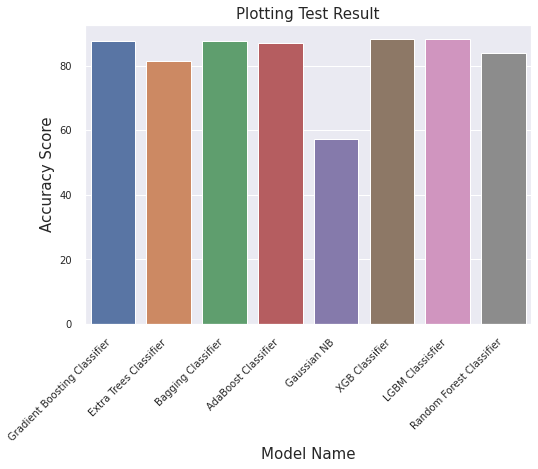

In [ ]:
# Visualisasi model
plt.figure()
sns.barplot(x = n, y = s)

plt.title("Plotting Test Result")
plt.xlabel('Model Name')

plt.xticks(rotation=45, ha='right', size=10)
plt.yticks(size=10)
plt.ylabel('Accuracy Score')

plt.show()

### Feature Importance

In [ ]:
# get best models [-1] is random forest and next [0] is index to model to get feature importance, and zipped with X column
importances = sorted([(a,b) for a,b in zip(result[-1][0].feature_importances_, X.columns)],reverse=True)
n = [ni for si,ni in importances]
s = [si for si,ni in importances]

- Taking important feature values
- Select model:
  - result[-1][0] : random forest
  - result[-4][0] : lgb
  - result[-5][0] : xgb

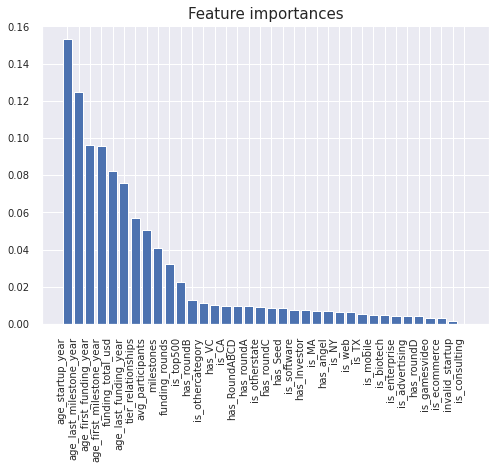

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(n,s)
plt.xticks(rotation=90, ha='right', size=10)
plt.yticks(size=10)
plt.show()

# Conclusions & Insights: UMKM Growth Analysis

## 1. Model Performance Summary
Based on the experimental results, ensemble-based models outperformed the deep learning approach in terms of raw accuracy for this specific dataset.

| Model Rank | Model Name | Accuracy |
| :--- | :--- | :--- |
| **1st** | **XGB Classifier / LGBM Classifier** | **88.10%** |
| **2nd** | Gradient Boosting / Bagging | **87.50%** |
| **3rd** | Neural Network (Sequential) | **84.52%** |
| **4th** | Random Forest Classifier | **83.93%** |

## 2. Key Technical Insights
* **Ensemble Superiority**: Gradient Boosting frameworks (XGBoost and LightGBM) achieved the highest accuracy (**88.10%**), proving that decision-tree-based ensembles are highly effective for structured UMKM data.
* **Neural Network Efficiency**: While the Neural Network achieved a respectable **84.52%** accuracy, it required significantly more training time (**50 epochs**) compared to the nearly instantaneous training of the Gradient Boosting models.
* **Dataset Constraints**: The dataset (X_train shape: **672 rows, 36 features**) is relatively small for a deep 3-layer Dense Neural Network, which allowed XGBoost/LGBM models to reach higher accuracy without overfitting.

## 3. Feature Importance (Top 10 Drivers)
By analyzing the Feature Importance from the **XGBoost** and **Random Forest** models, the following 10 factors were identified as the primary drivers of UMKM success status:

1.  **Age of Startup (Year)**: The total lifespan of the business.
2.  **Age at Last Milestone**: Time elapsed until the most recent significant business achievement.
3.  **Age at First Funding**: How early the business secured its first investment.
4.  **Age at First Milestone**: Time taken to reach the initial business milestone.
5.  **Total Funding (USD)**: The cumulative amount of capital raised.
6.  **Age at Last Funding**: The timing of the most recent capital injection.
7.  **Tier Relationships**: The quality and level of business networking.
8.  **Average Participants**: The average scale of involvement in funding or projects.
9.  **Milestones**: The total count of significant business achievements.
10. **Funding Rounds**: The frequency and number of successful funding cycles.

## 4. Business Impact
With an **88% accuracy rate**, this model serves as an effective early-warning system for MSMEs to evaluate their survival and growth potential based on historical investment and milestone timing.